# Word embeddings

### Resources

- Word2vec (Mikolov et al., 2013): https://code.google.com/archive/p/word2vec/
- Fasttext: http://www.fasttext.cc/ (+sub-word information, +multilingual)
- Glove (Pennington, Socher, Manning, 2014): http://nlp.stanford.edu/projects/glove/



Gensim documentation: https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec

Embeddings visualizer: https://projector.tensorflow.org/


## Loading and using word embeddings

In [ ]:
import gensim


In [ ]:
# Show all available models in gensim-data
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
# Download the "GloVe 25" embeddings
embeddings_twitter = gensim.downloader.load('glove-twitter-200')
embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [ ]:
# embeddings = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [ ]:
print(len(embeddings.index_to_key))
print(len(embeddings_twitter.index_to_key))

999999
1193514


In [ ]:
embeddings.get_vector('cat')

array([ 4.7426e-02, -4.2203e-02,  2.8491e-02, -4.4481e-02, -2.6467e-02,
        3.3557e-02,  1.7173e-01, -1.4773e-01,  7.1133e-02,  3.8385e-02,
       -7.9921e-02, -1.3236e-03,  1.6185e-01, -1.6389e-01, -6.5456e-02,
        2.7030e-02,  1.2193e-01, -7.1632e-02,  7.9642e-02, -1.4602e-01,
        1.0369e-02, -1.0468e-01,  3.6734e-02,  7.9116e-02,  1.8241e-01,
       -2.4902e-03,  1.3818e-02,  1.2378e-01,  1.7348e-04,  1.6646e-02,
       -1.3513e-02, -7.5532e-02,  1.0060e-01,  7.1226e-02, -2.7468e-02,
       -7.8517e-02,  3.3769e-02, -1.6082e-01, -2.2747e-02, -1.3238e-01,
        1.1198e-02, -1.2838e-01, -5.8910e-02, -5.1399e-02,  3.9177e-02,
        5.8243e-02,  2.2071e-02,  7.1876e-02,  2.8166e-02, -1.8918e-02,
        3.4445e-02,  1.5664e-01,  6.9836e-02, -2.0858e-01,  2.4413e-03,
       -8.9110e-02, -6.0705e-02,  6.5106e-02, -8.3036e-02,  1.7491e-02,
       -3.4527e-02, -2.5026e-01,  1.8777e-01, -3.6235e-02,  1.2452e-01,
        2.4356e-02, -4.4517e-03,  5.5572e-02, -8.6161e-03, -1.61

In [ ]:
embeddings.most_similar('cat')

[('cats', 0.8368596434593201),
 ('housecat', 0.767471194267273),
 ('-cat', 0.7602992057800293),
 ('dog', 0.7502298951148987),
 ('kitten', 0.7480817437171936),
 ('feline', 0.7353992462158203),
 ('super-cat', 0.7305206060409546),
 ('supercat', 0.7163284420967102),
 ('pet', 0.7090284824371338),
 ('moggy', 0.7057286500930786)]

In [ ]:
embeddings_twitter.most_similar('cat')

[('dog', 0.8324302434921265),
 ('cats', 0.7685185074806213),
 ('kitty', 0.750445544719696),
 ('kitten', 0.7489697933197021),
 ('pet', 0.7319862842559814),
 ('puppy', 0.7023192644119263),
 ('dogs', 0.7016381621360779),
 ('animal', 0.6421106457710266),
 ('bear', 0.6309184432029724),
 ('meow', 0.6304775476455688)]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(
    embeddings.get_vector('cat').reshape(1,-1),
    embeddings.get_vector('kitten').reshape(1,-1)
    )[0][0]

0.7480817

In [ ]:
import numpy as np

In [ ]:
exar = np.array([1,2,3,4])
exar.reshape(-1, 1)
# Documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
exar.reshape??

In [ ]:
embeddings.similarity('cat', 'kitten')

0.74808174

In [ ]:
embeddings.similarity('cat', 'puppy')

0.6651119

In [ ]:
embeddings.closer_than('cat', 'puppy')

['dog',
 'cats',
 'Cat',
 'pet',
 'kitten',
 'feline',
 'kitty',
 'subcat',
 'felines',
 'beagle',
 'sub-cat',
 'tomcat',
 'moggy',
 'housecat',
 'supercat',
 'moggie',
 'she-cat',
 're-cat',
 'cat-',
 'kittypet',
 'super-cat',
 '-cat']

#### Synonymy vs relatedness

In [ ]:
embeddings.similarity('uncle', 'sister')

0.7174434

In [ ]:
embeddings_twitter.similarity('uncle', 'sister')

0.6477544

In [ ]:
embeddings_twitter.similarity('sibling', 'sister')

0.517647

In [ ]:
embeddings_twitter.similarity('good', 'bad')

0.7983508

In [ ]:
embeddings.similarity('good', 'bad')

0.8503089

In [ ]:
embeddings.similarity('sister', 'sibling')

0.76012087

In [ ]:
embeddings.similarity('sister', 'mother')

0.76116526

In [ ]:
embeddings.similarity('Monday', 'Sunday')

0.85126

#### Normalization

In [ ]:
embeddings.most_similar("defenitly")

[('defenitely', 0.8840630650520325),
 ('defenetly', 0.8451886177062988),
 ('defently', 0.8433688282966614),
 ('definitly', 0.7705455422401428),
 ('definetly', 0.7526832818984985),
 ('politly', 0.7457023859024048),
 ('defnitely', 0.7323918342590332),
 ('probebly', 0.7254762649536133),
 ('definatly', 0.7249115109443665),
 ('usuallly', 0.7225544452667236)]

In [ ]:
embeddings.most_similar("hiii")

[('hiiii', 0.942829430103302),
 ('Hiii', 0.8571421504020691),
 ('Hiiii', 0.8538976311683655),
 ('hii', 0.7178280353546143),
 ('iiii', 0.7104865908622742),
 ('plzzz', 0.6919779181480408),
 ('plzzzz', 0.6852996945381165),
 ('hhh', 0.6836094260215759),
 ('wazzup', 0.6829248070716858),
 ('plzz', 0.6775454878807068)]

#### Word analogies

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828966617584229),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654637932777405),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.860465943813324)]

In [ ]:
# king - man + woman
embeddings.most_similar_cosmul(positive=['king', 'woman'], negative=['man'])

[('queen', 0.9390855431556702),
 ('queen-mother', 0.9078598618507385),
 ('king-', 0.8828966617584229),
 ('queen-consort', 0.882541835308075),
 ('child-king', 0.8680858016014099),
 ('monarch', 0.8670082688331604),
 ('ex-queen', 0.8654637932777405),
 ('princess', 0.8628991842269897),
 ('queen-', 0.8613532781600952),
 ('boy-king', 0.860465943813324)]

In [ ]:
# Rome - Italy + France
embeddings.most_similar_cosmul(positive=['Rome', 'France'], negative=['Italy'])

[('Paris', 0.9433915019035339),
 ('Meaux', 0.8968006372451782),
 ('Avignon', 0.8785353302955627),
 ('Saint-Denis', 0.8744450807571411),
 ('Rouen', 0.8729321956634521),
 ('Lyon', 0.8724958300590515),
 ('Louville', 0.8714753985404968),
 ('Toulouse', 0.8713099360466003),
 ('Beauvais', 0.8704253435134888),
 ('Blois', 0.8698782920837402)]

In [ ]:
# pasta - Italian + Romanian
embeddings.most_similar_cosmul(positive=['pasta', 'Romanian'], negative=['Italian'])

[('polenta', 0.7852737307548523),
 ('bulgar', 0.7823466658592224),
 ('bulgur', 0.7699621915817261),
 ('babka', 0.766016960144043),
 ('soup', 0.7643554210662842),
 ('mămăligă', 0.7633044719696045),
 ('cereal', 0.7588525414466858),
 ('pelmeni', 0.7585715651512146),
 ('masa', 0.7559653520584106),
 ('tin', 0.7554841041564941)]

In [ ]:
# cat - dog + puppy
embeddings.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9267358779907227),
 ('kitty', 0.8846307396888733),
 ('cats', 0.8722013235092163),
 ('kittens', 0.8703644871711731),
 ('kitties', 0.8619921803474426),
 ('kitteh', 0.8562358021736145),
 ('housecat', 0.8552347421646118),
 ('moggy', 0.8512866497039795),
 ('-cat', 0.8492761850357056),
 ('moggie', 0.847593367099762)]

In [ ]:
# purple - blue + yellow
# green - blue + red?
embeddings.most_similar_cosmul(positive=['purple', 'yellow'], negative=['blue'])

[('orange', 0.9281182289123535),
 ('green-yellow', 0.9220715761184692),
 ('pink', 0.9197203516960144),
 ('orange-yellow', 0.9192143678665161),
 ('white-yellow', 0.9170408844947815),
 ('red-yellow', 0.9141272306442261),
 ('purple-blue', 0.9109879732131958),
 ('purple-red', 0.9094882607460022),
 ('yellow-orange', 0.9063596725463867),
 ('yellow-green', 0.9045568108558655)]

In [ ]:
embeddings_twitter.most_similar_cosmul(positive=['brother', 'woman'], negative=['man'])

[('sister', 0.9794360399246216),
 ('daughter', 0.9412024617195129),
 ('mother', 0.9372841715812683),
 ('mom', 0.9262226223945618),
 ('husband', 0.91740882396698),
 ('friend', 0.9102033376693726),
 ('wife', 0.9087694883346558),
 ('dad', 0.9083817005157471),
 ('sisters', 0.9073351621627808),
 ('father', 0.9037760496139526)]

In [ ]:
embeddings_twitter.most_similar_cosmul(positive=['cat', 'puppy'], negative=['dog'])

[('kitten', 0.9388771653175354),
 ('kitty', 0.9139494895935059),
 ('pup', 0.8514729738235474),
 ('puppies', 0.8475602269172668),
 ('kittens', 0.8263034224510193),
 ('pug', 0.8220088481903076),
 ('cute', 0.8175343871116638),
 ('cats', 0.8136031031608582),
 ('husky', 0.8109297156333923),
 ('pet', 0.8099460005760193)]

In [ ]:
# computer_progammer - man + woman ... homemaker?
embeddings.most_similar_cosmul(positive=['programmer', 'woman'], negative=['man'])

[('non-programmer', 0.8644444346427917),
 ('programmers', 0.8571239113807678),
 ('Programmer', 0.8313320875167847),
 ('non-programmers', 0.8269446492195129),
 ('writer', 0.8260435461997986),
 ('coder', 0.8254762291908264),
 ('programer', 0.8239933848381042),
 ('nonprogrammers', 0.8238458633422852),
 ('web-designer', 0.819828987121582),
 ('researcher', 0.8139449954032898)]

In [ ]:
embeddings.doesnt_match((('dog', 'cat', 'mouse', 'cake')))

'cake'

#### Multilingual embeddings & false friends

In [ ]:
!wget https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.en.vec # English embeddings, prealigned
!wget https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.es.vec # Spanish embeddings, prealigned

--2023-04-10 15:39:01--  https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.162.20, 52.84.162.119, 52.84.162.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.162.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628614720 (599M) [text/plain]
Saving to: ‘wiki.multi.en.vec.1’

wiki.multi.en.vec.1 100%[===================>] 599.49M   133MB/s    in 5.0s    

2023-04-10 15:39:06 (120 MB/s) - ‘wiki.multi.en.vec.1’ saved [628614720/628614720]

--2023-04-10 15:39:06--  https://dl.fbaipublicfiles.com/arrival/vectors/wiki.multi.es.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.162.103, 52.84.162.119, 52.84.162.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.162.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 628826336 (600M) [text/plain]
Saving to: ‘wiki.multi.es.vec.1’

wiki.multi.

Loading pretrained embeddings from local files

In [ ]:
from gensim.models import KeyedVectors
en_model = KeyedVectors.load_word2vec_format('wiki.multi.en.vec')  # Watch out for your RAM...
es_model = KeyedVectors.load_word2vec_format('wiki.multi.es.vec')


In [ ]:
embarrassed_vec = en_model.get_vector("embarassed")
pregnant_vec = en_model.get_vector("pregnant")
embarazada_vec = es_model.get_vector("embarazada")

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity([embarrassed_vec, pregnant_vec, embarazada_vec])

words = ("embarrassed", "pregnant", "embarazada")
print("%27s %15s %15s" % words)
for i, row in enumerate(similarity_matrix):
  print("%15s %.13f %.13f %.13f" % (words[i], *row))

                embarrassed        pregnant      embarazada
    embarrassed 0.9999999403954 0.2995810210705 0.3134102821350
       pregnant 0.2995810210705 1.0000000000000 0.8302524089813
     embarazada 0.3134102821350 0.8302524089813 1.0000000000000


In [ ]:
es_model.similar_by_vector(embarrassed_vec)

[('parecerme', 0.6807215213775635),
 ('insultarme', 0.6778432726860046),
 ('sinceramente', 0.675748884677887),
 ('discúlpame', 0.6600538492202759),
 ('equivocarme', 0.6517462134361267),
 ('digo', 0.6503289937973022),
 ('diciéndome', 0.6467952132225037),
 ('disculpo', 0.6451693177223206),
 ('disculparme', 0.6407719850540161),
 ('ridículo', 0.6402308940887451)]

In [ ]:
en_model.similar_by_vector(embarazada_vec)

[('pregnant', 0.8302525877952576),
 ('miscarried', 0.715323269367218),
 ('miscarries', 0.6865615844726562),
 ('miscarriage', 0.664211094379425),
 ('stepmother', 0.6626667976379395),
 ('fiancé', 0.6595430970191956),
 ('mother', 0.6589699387550354),
 ('stepdaughter', 0.6581923365592957),
 ('pregnancy', 0.6562281250953674),
 ('distraught', 0.6525552868843079)]

## Training embeddings

In [ ]:
gensim.models.Word2Vec(sentences=None, corpus_file=None, # Your corpus here!
                                vector_size=100, alpha=0.025, window=5, min_count=5,
                                max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0,
                                negative=5, ns_exponent=0.75, cbow_mean=1, null_word=0, trim_rule=None,
                                sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(),
                                max_final_vocab=None)


In [ ]:
gensim.models.Word2Vec??

In [ ]:
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
model = gensim.models.Word2Vec(sentences, min_count=1)

In [ ]:
model.wv.similarity('dog', 'cat')

0.17018887

In [ ]:
model.wv.get_vector('cat')

array([-0.00713902,  0.00124103, -0.00717672, -0.00224462,  0.0037193 ,
        0.00583312,  0.00119818,  0.00210273, -0.00411039,  0.00722533,
       -0.00630704,  0.00464722, -0.00821997,  0.00203647, -0.00497705,
       -0.00424769, -0.00310898,  0.00565521,  0.0057984 , -0.00497465,
        0.00077333, -0.00849578,  0.00780981,  0.00925729, -0.00274233,
        0.00080022,  0.00074665,  0.00547788, -0.00860608,  0.00058446,
        0.00686942,  0.00223159,  0.00112468, -0.00932216,  0.00848237,
       -0.00626413, -0.00299237,  0.00349379, -0.00077263,  0.00141129,
        0.00178199, -0.0068289 , -0.00972481,  0.00904058,  0.00619805,
       -0.00691293,  0.00340348,  0.00020606,  0.00475375, -0.00711994,
        0.00402695,  0.00434743,  0.00995737, -0.00447374, -0.00138926,
       -0.00731732, -0.00969783, -0.00908026, -0.00102275, -0.00650329,
        0.00484973, -0.00616403,  0.00251919,  0.00073944, -0.00339215,
       -0.00097922,  0.00997913,  0.00914589, -0.00446183,  0.00

In [ ]:
model.wv.save_word2vec_format("cats_model.bin")

In [ ]:
loaded_model = gensim.models.KeyedVectors.load_word2vec_format("cats_model.bin")

In [ ]:
loaded_model.index_to_key # vocabulary

['say', 'woof', 'dog', 'meow', 'cat']

In [ ]:
loaded_model.similarity('dog', 'cat')

0.17018887

# Contextual embeddings and language models

In [ ]:
!pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from transformers import BertModel, BertTokenizer

**Disclaimer**: Each pretrained transformer model (e.g. BERT base) has its own tokenizer, where the vocabulary of types (possible values for the tokens) is determined automatically based on the corpus and might not all be words in the dictionary (also includes subwords etc). You can learn more about transformers using the resources below, or at next year's NLP courses.

In [ ]:
# Load pre-trained model
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained('bert-base-cased', return_dict=True)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


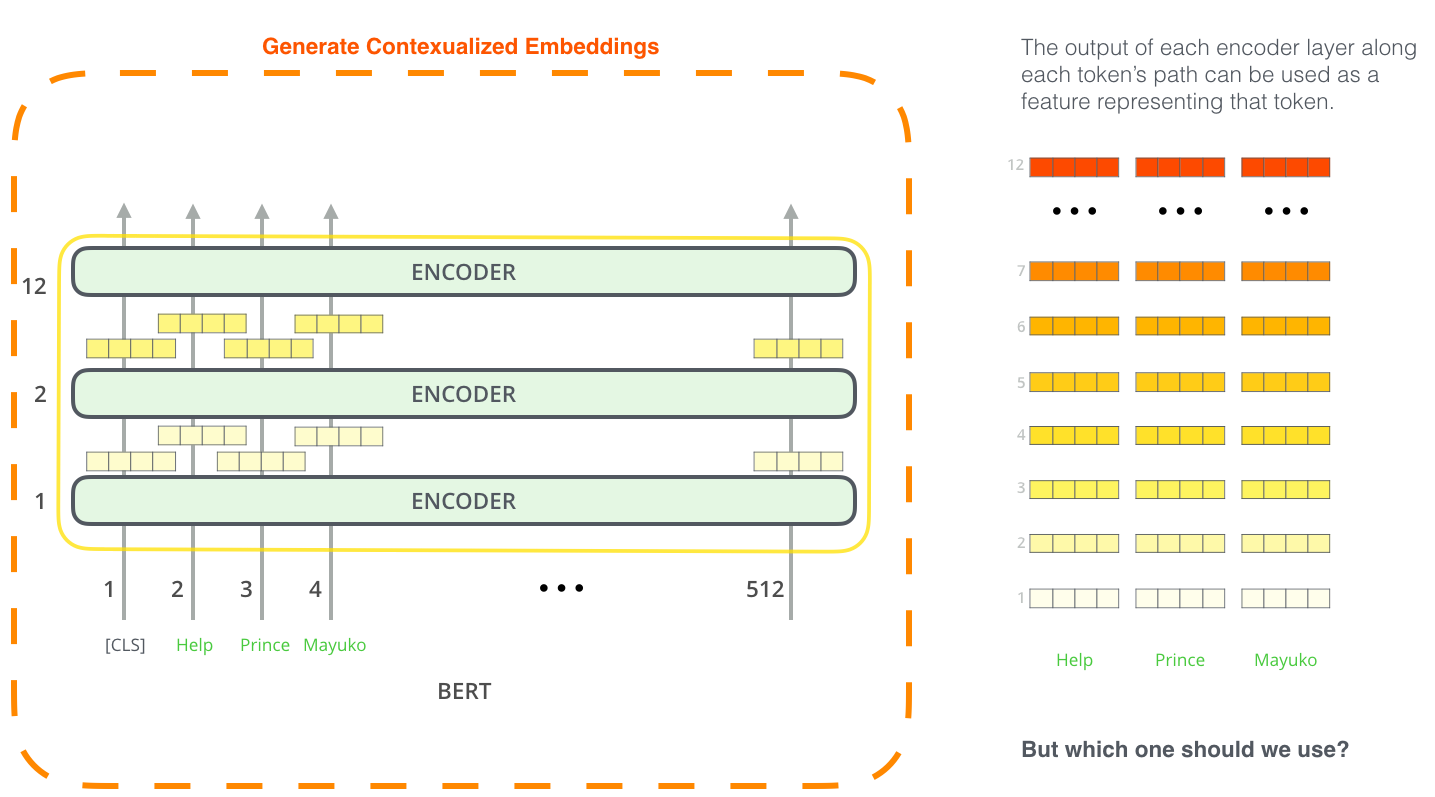

We want our model to return the hidden states, so we can capture them. The output_hidden_states parameter needs to be set to True for this.

There are 13 hidden states, the first corresponding to the embedding (projecting the vocabulary word to the (768,) embedding) and the rest corresponding to the 12 layers in the BERT-base model.

Output of each hidden state is (batch_size, number_of_tokens, 768).

Additional visualizations: https://jalammar.github.io/illustrated-bert/

In [ ]:
text = "I never acted in a play before."
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs, output_hidden_states=True)

In [ ]:
inputs

{'input_ids': tensor([[ 101,  146, 1309, 5376, 1107,  170, 1505, 1196,  119,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
outputs


BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.6465, -0.0340, -0.0343,  ..., -0.2017,  0.4150, -0.0688],
         [ 0.5861, -0.4964,  0.3969,  ..., -0.0649,  0.0623,  0.3182],
         [ 0.3198, -0.0435, -0.3961,  ...,  0.5159, -0.0444, -0.0523],
         ...,
         [ 0.3881, -0.5949,  0.0154,  ...,  0.0614,  0.3631, -0.2837],
         [ 0.5163, -0.2328, -0.0715,  ..., -0.1547,  0.1601, -0.1654],
         [ 0.8123,  0.1996, -0.2672,  ..., -0.4530,  0.1853, -0.3697]]],
       grad_fn=<NativeLayerNormBackward0>), pooler_output=tensor([[-6.8066e-01,  4.4834e-01,  9.9995e-01, -9.9714e-01,  9.7919e-01,
          8.8241e-01,  9.9458e-01, -9.9277e-01, -9.8259e-01, -7.1344e-01,
          9.9216e-01,  9.9932e-01, -9.9824e-01, -9.9990e-01,  8.6363e-01,
         -9.9137e-01,  9.9463e-01, -6.2191e-01, -9.9998e-01, -8.6428e-01,
         -4.8440e-01, -9.9994e-01,  3.3618e-01,  9.7413e-01,  9.8518e-01,
          1.1825e-02,  9.9423e-01,  9.9998e-01,  9.4406e-01, -4.143

In [ ]:
len(outputs.hidden_states)


13

In [ ]:
for k in outputs:
  print(k)
  try:
    print(type(outputs[k]), outputs[k].shape)
  except:
    for t in outputs[k]:
      print(type(t), t.shape)

last_hidden_state
<class 'torch.Tensor'> torch.Size([1, 10, 768])
pooler_output
<class 'torch.Tensor'> torch.Size([1, 768])
hidden_states
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])
<class 'torch.Tensor'> torch.Size([1, 10, 768])


`hidden_states` contains intermediary layer outputs.

`last_hidden_state` contains the final output, with a 768-sized embedding for each input word.

`pooler_output` combines the word embeddings from the last hidden state into one sentence-level output.

For retrieving word embeddings we will use `last_hidden_state`.

In [ ]:

# first hidden layer
outputs.hidden_states[0].size()

# last hidden layer
outputs.hidden_states[-1].size()

torch.Size([1, 10, 768])

In [ ]:

embedding = model.embeddings.word_embeddings
E = embedding.weight
E.size()

torch.Size([28996, 768])

In [ ]:
def bert_text_preparation(text, tokenizer):
    """Preparing the input for BERT

    Takes a string argument and performs
    pre-processing like adding special tokens,
    tokenization, tokens to ids, and tokens to
    segment ids. All tokens are mapped to seg-
    ment id = 1.

    Args:
        text (str): Text to be converted
        tokenizer (obj): Tokenizer object
            to convert text into BERT-re-
            adable tokens and ids

    Returns:
        list: List of BERT-readable tokens
        obj: Torch tensor with token ids
        obj: Torch tensor segment ids


    """
    marked_text = "[CLS] " + text + " [SEP]"
    tokenized_text = tokenizer.tokenize(marked_text)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
    segments_ids = [1]*len(indexed_tokens)

    # Convert inputs to PyTorch tensors
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])

    return tokenized_text, tokens_tensor, segments_tensors

In [ ]:
bert_text_preparation("I like to play football.", tokenizer)

(['[CLS]', 'I', 'like', 'to', 'play', 'football', '.', '[SEP]'],
 tensor([[ 101,  146, 1176, 1106, 1505, 1709,  119,  102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1]]))

In [ ]:
bert_text_preparation("I never acted in a play before.", tokenizer)

(['[CLS]', 'I', 'never', 'acted', 'in', 'a', 'play', 'before', '.', '[SEP]'],
 tensor([[ 101,  146, 1309, 5376, 1107,  170, 1505, 1196,  119,  102]]),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]))

In [ ]:
def get_bert_embeddings(tokens_tensor, segments_tensors, model):
    """Get embeddings from an embedding model

    Args:
        tokens_tensor (obj): Torch tensor size [n_tokens]
            with token ids for each token in text
        segments_tensors (obj): Torch tensor size [n_tokens]
            with segment ids for each token in text
        model (obj): Embedding model to generate embeddings
            from token and segment ids

    Returns:
        list: List of list of floats of size
            [n_tokens, n_embedding_dimensions]
            containing embeddings for each token

    """

    # Gradient calculation id disabled
    # Model is in inference mode
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors, output_hidden_states=True)
        # Removing the first hidden state
        # The first state is the input state
        hidden_states = outputs.hidden_states[1:]

    # Getting embeddings from the final BERT layer
    token_embeddings = hidden_states[-1]
    # Collapsing the tensor into 1-dimension
    token_embeddings = torch.squeeze(token_embeddings, dim=0)
    # Converting torchtensors to lists
    list_token_embeddings = [token_embed.tolist() for token_embed in token_embeddings]

    return list_token_embeddings

In [ ]:
text = "I never acted in a play before."
tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

In [ ]:
len(list_token_embeddings[0])

768

In [ ]:
texts = ["I have never acted in a play before.", "I like to play football", "Don't play with my feelings!"]

def get_embeddings_for_texts(texts, word):
  # Getting embeddings for the target
  # word in all given contexts
  target_word_embeddings = []

  for text in texts:
      tokenized_text, tokens_tensor, segments_tensors = bert_text_preparation(text, tokenizer)
      list_token_embeddings = get_bert_embeddings(tokens_tensor, segments_tensors, model)

      # Find the position of the word in list of tokens
      if word in tokenized_text:
        word_index = tokenized_text.index(word)
        # Get the embedding
        word_embedding = list_token_embeddings[word_index]

        target_word_embeddings.append(word_embedding)
  return target_word_embeddings

In [ ]:
from scipy.spatial.distance import cosine
import pandas as pd
# Calculating the distance between the
# embeddings of 'play' in all the
# given contexts of the word
target_word_embeddings = get_embeddings_for_texts(texts, 'play') + get_embeddings_for_texts(texts[2:3], 'feelings')
all_texts = texts + texts[2:3]
all_words = ['play']*len(texts) + ['feelings']
list_of_distances = []
for text1, embed1, word1 in zip(all_texts, target_word_embeddings, all_words):
    for text2, embed2, word2 in zip(all_texts, target_word_embeddings, all_words):
        cos_dist = 1 - cosine(embed1, embed2)
        list_of_distances.append([text1, text2, word1, word2, cos_dist])

distances_df = pd.DataFrame(list_of_distances, columns=['text1', 'text2', 'word1', 'word2', 'similarity'])

In [ ]:
distances_df

,text1,text2,word1,word2,similarity
0,I have never acted in a play before.,I have never acted in a play before.,play,play,1.000000
1,I have never acted in a play before.,I like to play football,play,play,0.701985
2,I have never acted in a play before.,Don't play with my feelings!,play,play,0.656635
3,I have never acted in a play before.,Don't play with my feelings!,play,feelings,0.656109
4,I like to play football,I have never acted in a play before.,play,play,0.701985
5,I like to play football,I like to play football,play,play,1.000000
6,I like to play football,Don't play with my feelings!,play,play,0.745610
7,I like to play football,Don't play with my feelings!,play,feelings,0.620524
8,Don't play with my feelings!,I have never acted in a play before.,play,play,0.656635
9,Don't play with my feelings!,I like to play football,play,play,0.745610


More transformer resources:

- BERT paper: https://arxiv.org/abs/1810.04805
- https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/
- Repository of pretrained models: https://huggingface.co/
- Romanian BERT: https://huggingface.co/readerbench/RoBERT-base


# Exercises (1p)

1. Find a sentence in a news article online and store it in a python variable. Lemmatize the text. Compute the semantic similarity (based on pretrained word embeddings) between each original word in the text and its lemma.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import gensim
import gensim.downloader


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text = "A huge asteroid the size of 90 elephants has been spotted hurtling towards Earth at a speed of 15.8km/s, with NASA now tracking its journey and anticipating a fly-by"

In [ ]:
lemmatizer = WordNetLemmatizer()
tokens = nltk.word_tokenize(text)
lemmas = [lemmatizer.lemmatize(token) for token in tokens]

similarities = []
similarities = []
for i, token in enumerate(tokens):
    if token in embeddings_twitter and lemmas[i] in embeddings_twitter:
        similarity = embeddings_twitter.similarity(token, lemmas[i])
    else:
        similarity = "Token not in embeddings_twitter"
    similarities.append(similarity)

for i, token in enumerate(tokens):
    print(f"Word: {token}, Lemma: {lemmas[i]}, Similarity: {similarities[i]}")


Word: A, Lemma: A, Similarity: Token not in embeddings_twitter
Word: huge, Lemma: huge, Similarity: 1.0
Word: asteroid, Lemma: asteroid, Similarity: 1.0
Word: the, Lemma: the, Similarity: 1.0000001192092896
Word: size, Lemma: size, Similarity: 0.9999999403953552
Word: of, Lemma: of, Similarity: 0.9999999403953552
Word: 90, Lemma: 90, Similarity: Token not in embeddings_twitter
Word: elephants, Lemma: elephant, Similarity: 0.6362097263336182
Word: has, Lemma: ha, Similarity: 0.596520721912384
Word: been, Lemma: been, Similarity: 1.0
Word: spotted, Lemma: spotted, Similarity: 0.9999999403953552
Word: hurtling, Lemma: hurtling, Similarity: 1.0
Word: towards, Lemma: towards, Similarity: 1.0
Word: Earth, Lemma: Earth, Similarity: Token not in embeddings_twitter
Word: at, Lemma: at, Similarity: 1.0
Word: a, Lemma: a, Similarity: 1.0000001192092896
Word: speed, Lemma: speed, Similarity: 1.0
Word: of, Lemma: of, Similarity: 0.9999999403953552
Word: 15.8km/s, Lemma: 15.8km/s, Similarity: Token 

2. Download the Sim-Lex dataset: https://fh295.github.io/simlex.html, containing word pairs and similarity scores for each pair. Compute the similarities between the word pairs using word embeddings and cosine-distance. Compute the Spearman Correlation between the obtained similarities and the similarities reported in the dataset (use the `SimLex999` / `Assoc(USF)` field in the `SimLex-999.txt` file). Ignore any words not found in the chosen embeddings space.

Note: you can access the file from the Colaboratory notebook by uploading it to session storage, using the lefthand button "Files" -> "Upload to session storage"

In [ ]:
import scipy
from scipy import stats
stats.spearmanr??

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr

In [ ]:
df = pd.read_csv('/content/SimLex-999.txt', sep="\t")
df

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93
...,...,...,...,...,...,...,...,...,...,...
994,join,acquire,V,2.85,2.86,2.93,2,0.00,0,0.99
995,send,attend,V,1.67,2.70,3.17,2,0.00,0,1.44
996,gather,attend,V,4.80,2.75,3.17,2,0.00,0,1.97
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.00,0,1.75


In [ ]:
# embeddings_twitter = gensim.downloader.load('glove-twitter-200')
embeddings_news = gensim.downloader.load('fasttext-wiki-news-subwords-300')


In [ ]:
cos_similarity = []
assoc_similarity = []

for index, row in df.iterrows():
  word1 = row['word1']
  word2 = row['word2']

  if word1 in embeddings_twitter and word2 in embeddings_twitter:
    word1_emb = embeddings_twitter.get_vector(word1)
    word2_emb = embeddings_twitter.get_vector(word2)
    similarity = cosine_similarity(word1_emb.reshape(1,-1), word2_emb.reshape(1,-1))[0][0]
    cos_similarity.append(similarity)
    assoc_similarity.append(row['Assoc(USF)'])


spearman_coef, p = spearmanr(cos_similarity, assoc_similarity)
print(f"Spearman Correlation: {spearman_coef}")

Spearman Correlation: 0.33873545661784676


Compare two different embedding models, see which yields the higher correlation.


In [ ]:
twitter_similarity = []
news_similarity = []
assoc_similarity = []

for index, row in df.iterrows():
  word1 = row['word1']
  word2 = row['word2']

  if word1 in embeddings_twitter and word2 in embeddings_twitter:
    similarity_twitter = cosine_similarity(embeddings_twitter.get_vector(word1).reshape(1,-1), embeddings_twitter.get_vector(word2).reshape(1,-1))[0][0]
    similarity_news = cosine_similarity(embeddings_news.get_vector(word1).reshape(1,-1), embeddings_news.get_vector(word2).reshape(1,-1))[0][0]
    twitter_similarity.append(similarity_twitter)
    news_similarity.append(similarity_news)
    assoc_similarity.append(row['Assoc(USF)'])




In [ ]:
spear_twitter_assoc, p = spearmanr(twitter_similarity, assoc_similarity)
spear_news_assoc, p = spearmanr(news_similarity, assoc_similarity)
spear_news_twitter, p = spearmanr(news_similarity, twitter_similarity)

print(f"Spearman Correlation => Twitter - Assoc(USF): {spear_twitter_assoc}")
print(f"Spearman Correlation => News - Assoc(USF): {spear_news_assoc}")
print(f"Spearman Correlation => News - Twitter: {spear_news_twitter}")

Spearman Correlation => Twitter - Assoc(USF): 0.33873545661784676
Spearman Correlation => News - Assoc(USF): 0.439913167013458
Spearman Correlation => News - Twitter: 0.5996674032742182


3. Take a paragraph from a corpus in NLTK. (e.g. the Brown corpus. Note: first you will need to download it using the downloader). Replace each word in the paragraph with its most similar word in embedding space.

AND/OR

Take a tweet from the web and replace each word with its most similar word in embedding space, using embeddings trained on Twitter data.

Do you get a coherent text?

In [ ]:
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
paragraph = nltk.corpus.brown.words()[:46]

print(' '.join(paragraph))

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election ,


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
new_paragraph = []
for word in paragraph:
  try:
        similar_word = embeddings_twitter.most_similar(word)[0][0]
        new_paragraph.append(similar_word)
  except KeyError:
        new_paragraph.append(word)

print(' '.join(new_paragraph))

The Fulton County Grand Jury told Friday be probe the Atlanta's latest secondary elections directed ´ nno proof " it anything discrepancies taking places <repeat> The verdict ahead told of term-end presentments it of City Executive Committee . also was bristols charges the of elections .


Try to first POS-tag the text and only replace nouns and adjectives with their most similar word in embedding space.

In [ ]:
import nltk

tagged_paragraph = nltk.pos_tag(paragraph)
new_paragraph = []
for word, pos in tagged_paragraph:
    if pos.startswith('N') or pos.startswith('J'):
        try:
            similar_word = embeddings_twitter.most_similar(word)[0][0]
            new_paragraph.append(similar_word)
        except KeyError:
            new_paragraph.append(word)
    else:
        new_paragraph.append(word)

print(tagged_paragraph)
print(' '.join(paragraph))
print(' '.join(new_paragraph))

[('The', 'DT'), ('Fulton', 'NNP'), ('County', 'NNP'), ('Grand', 'NNP'), ('Jury', 'NNP'), ('said', 'VBD'), ('Friday', 'NNP'), ('an', 'DT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NNP'), ('recent', 'JJ'), ('primary', 'JJ'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'DT'), ('evidence', 'NN'), ("''", "''"), ('that', 'IN'), ('any', 'DT'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.'), ('The', 'DT'), ('jury', 'NN'), ('further', 'RB'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'JJ'), ('presentments', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('City', 'NNP'), ('Executive', 'NNP'), ('Committee', 'NNP'), (',', ','), ('which', 'WDT'), ('had', 'VBD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'DT'), ('election', 'NN'), (',', ',')]
The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end 

4. Open a news website and find two articles on two different topics. Extract pairs of sentences from the two articles:

  a. two sentences from the first article

  b. two sentences from the second article

  c. one sentence from the first and one sentence from the second

Compute a semantic representation of each extracted sentence by averaging static (non-contextual) word embeddings for words in the sentence.

Now compute and compare similarities between the obtained representations for sentences in each pair: a, b and c. Which are the most similar?

In [ ]:
art_1_sent_1 = "Demand for memory chips ramped up during Covid-induced lockdowns as consumers bought new electronics to use at home"
art_1_sent_2 = "Samsung, the world's biggest maker of televisions, tablets and smartphones, had resisted the move to cut memory chip production compared to its competitors."

art_2_sent_1 = "Antarctica's melting ice sheet could retreat much faster than previously thought, new research suggests."
art_2_sent_2 = " The corrugations are created as the ice at this location repeatedly pats the sediments as the daily tides rise and fall."



In [ ]:
#embeddings_twitter = gensim.downloader.load('glove-twitter-200')

def semantic_repr(sentence):
  tokens = nltk.word_tokenize(sentence)
  emb = np.zeros(200)
  num_words = 0
  for token in tokens:
    if token in embeddings_twitter:
      emb += embeddings_twitter.get_vector(token)
      num_words += 1
  emb /= num_words
  return emb


In [ ]:
emb_art_1_sent_1= semantic_repr(art_1_sent_1 )
emb_art_1_sent_2 = semantic_repr(art_1_sent_2)

emb_art_2_sent_1 = semantic_repr(art_2_sent_1)
emb_art_2_sent_2 = semantic_repr(art_2_sent_2)

  a. two sentences from the first article


In [ ]:
similarity_a = cosine_similarity(
    emb_art_1_sent_1.reshape(1,-1),
    emb_art_1_sent_2.reshape(1,-1)
    )[0][0]

print(f"Similarity between sent 1 and sent 2 from first article: {similarity_a}")

Similarity between sent 1 and sent 2 from first article: 0.9321545952735968


  b. two sentences from the second article


In [ ]:
similarity_b = cosine_similarity(
    emb_art_2_sent_1.reshape(1,-1),
    emb_art_2_sent_2.reshape(1,-1)
    )[0][0]

print(f"Similarity between sent 1 and sent 2 of second article: {similarity_b}")

Similarity between sent 1 and sent 2 of second article: 0.921711433047885


  c. one sentence from the first and one sentence from the second


In [ ]:
similarity_c = cosine_similarity(
    emb_art_1_sent_2.reshape(1,-1),
    emb_art_2_sent_1.reshape(1,-1)
    )[0][0]

print(f"Similarity from sent 2 of first article and sent 1 of second article: {similarity_c}")

Similarity from sent 2 of first article and sent 1 of second article: 0.9241915278612226


Repeat the experiment after removing stopwords from each sentence.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def semantic_repr(sentence):
  tokens = nltk.word_tokenize(sentence)
  emb = np.zeros(200)
  num_words = 0
  for token in tokens:
    if token in embeddings_twitter and token not in stop_words:
      emb += embeddings_twitter.get_vector(token)
      num_words += 1
  emb /= num_words
  return emb


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
emb_art_1_sent_1= semantic_repr(art_1_sent_1 )
emb_art_1_sent_2 = semantic_repr(art_1_sent_2)

emb_art_2_sent_1 = semantic_repr(art_2_sent_1)
emb_art_2_sent_2 = semantic_repr(art_2_sent_2)

  a. two sentences from the first article


In [ ]:
similarity_a = cosine_similarity(
    emb_art_1_sent_1.reshape(1,-1),
    emb_art_1_sent_2.reshape(1,-1)
    )[0][0]

print(f"Similarity between sent 1 and sent 2 from first article: {similarity_a}")

Similarity between sent 1 and sent 2 from first article: 0.8191374008480863


  b. two sentences from the second article


In [ ]:
similarity_b = cosine_similarity(
    emb_art_2_sent_1.reshape(1,-1),
    emb_art_2_sent_2.reshape(1,-1)
    )[0][0]

print(f"Similarity between sent 1 and sent 2 of second article: {similarity_b}")

Similarity between sent 1 and sent 2 of second article: 0.8656002629124019


  c. one sentence from the first and one sentence from the second


In [ ]:
similarity_c = cosine_similarity(
    emb_art_1_sent_2.reshape(1,-1),
    emb_art_2_sent_1.reshape(1,-1)
    )[0][0]

print(f"Similarity from sent 2 of first article and sent 1 of second article: {similarity_c}")

Similarity from sent 2 of first article and sent 1 of second article: 0.8766477184893583


5. Perform PCA on a subset of word vectors that you expect to find interesting differences/similarities, and plot the first two components.


In [ ]:
from sklearn.decomposition import PCA

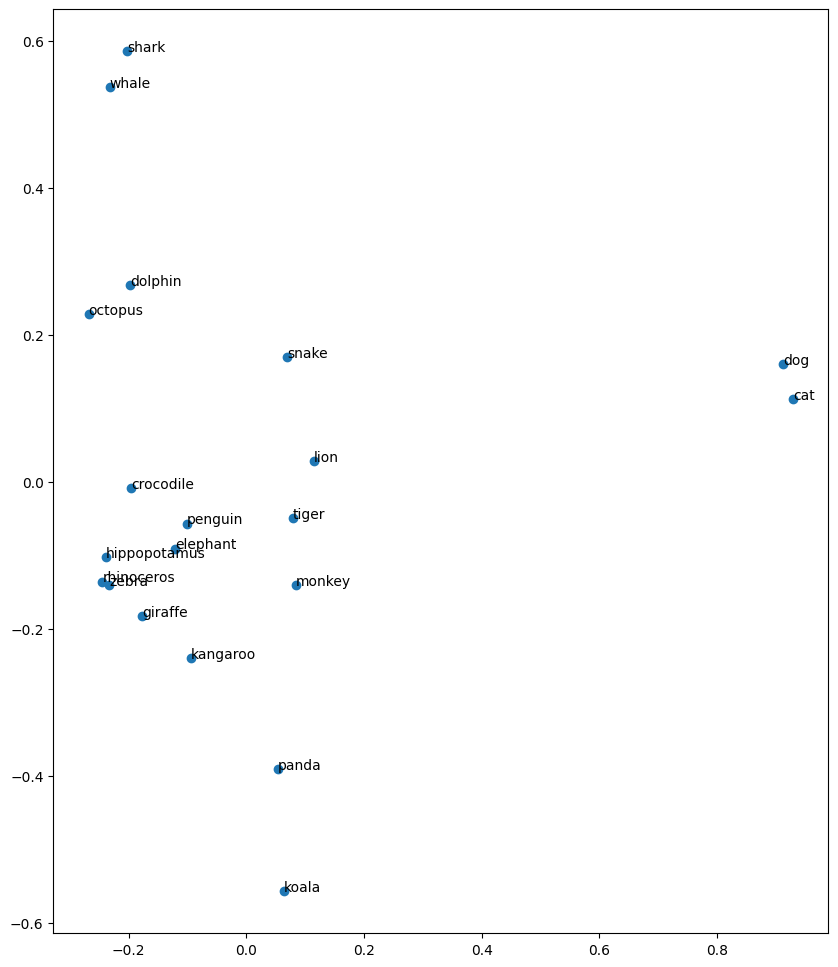

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

words = ['lion', 'snake', 'shark', 'panda', 'tiger', 'penguin', 'kangaroo', 'giraffe', 'elephant', 'crocodile', 'whale', 'koala', 'octopus', 'cat', 'hippopotamus', 'dog', 'monkey', 'zebra', 'dolphin', 'rhinoceros']

word_vectors = [embeddings_news[word] for word in words]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 12))

plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()


6. Retrieve 10 movie reviews (or 50 sentences) from the IMDB reviews corpus in NLTK. Extract embedding vectors for each word, then perform k-means clustering using a similarity measure between the vectors (cosine similarity, or the similarity function provided by gensim), and different values for k (k=3,5,) to cluster similar words together. Ignore words which are not found in the embedding space. What clusters do you get?

In [ ]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
corpus = nltk.corpus.movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import numpy as np
from sklearn.cluster import KMeans
import re


file_ids =corpus.fileids()[:10]

words = []
for file in file_ids:
    review = str(corpus.raw(file))
    review = re.sub(r'[^\w\s]', '', review) # remove symbols
    review_words = [word.lower() for word in word_tokenize(review) if word.isalpha()] #remove non-alphabetic characters
    for word in review_words:
        if word not in words and word in embeddings_news:
            words.append(word)

embeddings_filtered = [embeddings[word] for word in words]

cosine_similarities = cosine_similarity(embeddings_filtered)

kmeans = KMeans(n_clusters=5).fit(cosine_similarities)

for i in range(5):
    cluster_words = [words[j] for j in np.where(kmeans.labels_ == i)[0]]
    print("Cluster ", i, ":", cluster_words)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster  0 : ['sorta', 'cool', 'bad', 'mess', 'pretty', 'neat', 'terribly', 'jumbled', 'normal', 'fantasy', 'no', 'strange', 'weird', 'biggest', 'big', 'entertaining', 'thrilling', 'engaging', 'sad', 'strangeness', 'bit', 'plain', 'lazy', 'decent', 'confusing', 'redundant', 'craziness', 'horror', 'hot', 'nightmare', 'quick', 'damn', 'empty', 'flashy', 'stumbling', 'youre', 'wasted', 'occasional', 'jaded', 'thankful', 'nice', 'cute', 'sounds', 'slick', 'spectacular', 'bored', 'relatively', 'crazy', 'convoluted', 'young', 'poorly', 'extremely', 'predictable', 'arent', 'questionable', 'memorable', 'awful', 'recent', 'flawed', 'lively', 'colorful', 'mediocre', 'dull', 'belated', 'evil', 'oldman', 'magical', 'dangerous', 'blind', 'idle', 'sexist', 'pure', 'high', 'forgettable', 'angry', 'interesting', 'awfully', 'cloying', 'thrilled', 'enthusiastic', 'sound', 'grievous', 'lack', 'unstable', 'fatal', 'endless', 'stable', 'theatrical', 'inexpensive', 'special', 'frequent', 'latenight', 'sligh

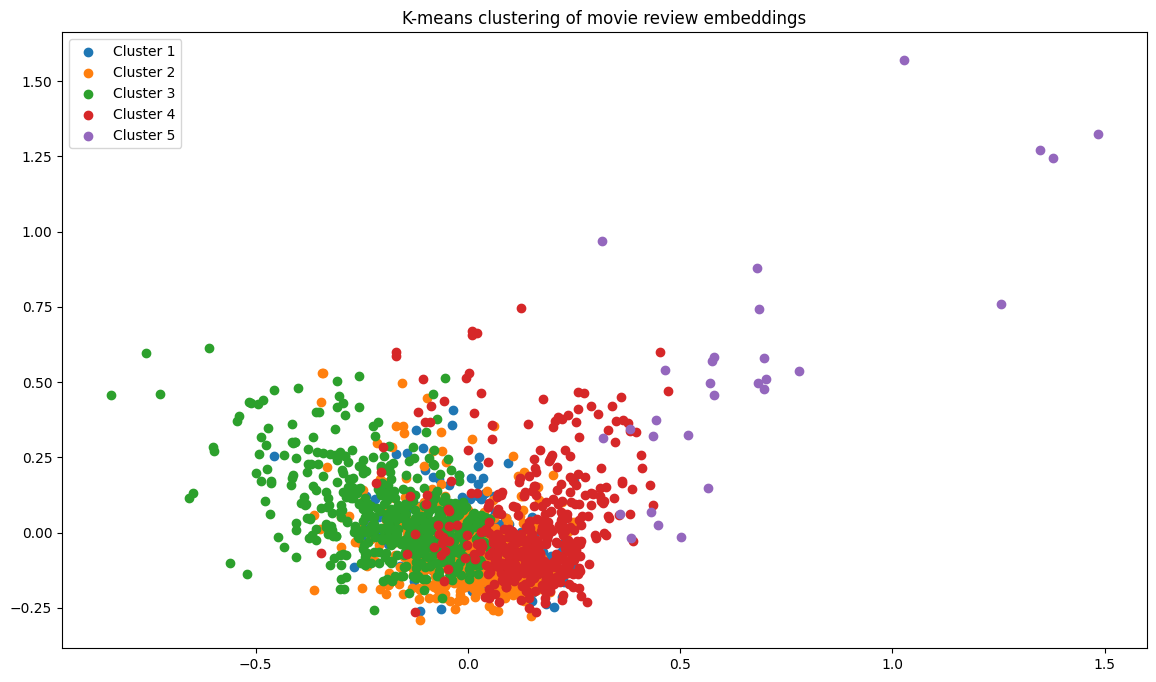

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_filtered)

plt.figure(figsize=(14, 8))


for i in range(5):
    cluster_embeddings = embeddings_2d[np.where(kmeans.labels_ == i)[0]]
    plt.scatter(cluster_embeddings[:, 0], cluster_embeddings[:, 1], label="Cluster "+str(i+1))

plt.legend()
plt.title("K-means clustering of movie review embeddings")
plt.show()
